In [27]:
# Import the required libraries
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import zipfile
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
# Get the current directory of the notebook
current_dir = os.getcwd()

# Navigate to the parent folder (Brain-Tumor-Classification)
parent_dir = os.path.dirname(current_dir)

# Define the path to the data folder
data_folder = os.path.join(parent_dir, 'data')

# Define the path to the zip file
zip_file_path = os.path.join(data_folder, 'archive.zip')

# Define the path to the output folder (where the zip will be extracted)
output_folder = data_folder

try:
    # Unzip the archive.zip file into the data folder
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(output_folder)
    print("Zip extraction successful")
except Exception as e:
    print("Zip extraction failed:", str(e))


Zip extraction successful


In [38]:
# Reading the training directory. Making filepath and labels ready for importing images for training
training_directory = os.path.join(data_folder, 'training') # Training folder path
file_paths = []   # creating the blank list to add complete filepath of training images
classes = []   # Creating blank list to add class labels in the list

folders = os.listdir(training_directory)
print(folders)

for folder in folders:
    folder_path = os.path.join(training_directory, folder)
    file_list = os.listdir(folder_path)
    for file in file_list:
        file_path = os.path.join(folder_path, file)

        file_paths.append(file_path)
        classes.append(folder)

# Creating dataframe ready with training files and class labels
Fpath_list = pd.Series(file_paths, name= 'file_paths')
class_list = pd.Series(classes, name='classes')

training_df = pd.concat([Fpath_list, class_list], axis= 1)

['pituitary', 'notumor', 'glioma', 'meningioma']


In [40]:
# Display the training dataframe
training_df

,file_paths,classes
0,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
1,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
2,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
3,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
4,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
...,...,...
5707,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
5708,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
5709,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
5710,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma


In [41]:
# Reading the testing directory.
# Making filepath and labels ready for importing images from testing directory
testing_directory = os.path.join(data_folder, 'testing')
file_paths = []
classes = []

folders = os.listdir(testing_directory)
for folder in folders:
    fold_path = os.path.join(testing_directory, folder)
    file_list = os.listdir(fold_path)
    for file in file_list:
        file_path = os.path.join(fold_path, file)

        file_paths.append(file_path)
        classes.append(folder)

# Concatenate data paths with labels into one dataframe
Fpath_list = pd.Series(file_paths, name= 'file_paths')
class_list = pd.Series(classes, name='classes')
testing_df = pd.concat([Fpath_list, class_list], axis= 1)

In [43]:
# Display the testing dataframe
testing_df

,file_paths,classes
0,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
1,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
2,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
3,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
4,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
...,...,...
1306,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
1307,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
1308,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
1309,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma


In [36]:
class_counts

classes
notumor       1595
pituitary     1457
meningioma    1339
glioma        1321
Name: count, dtype: int64

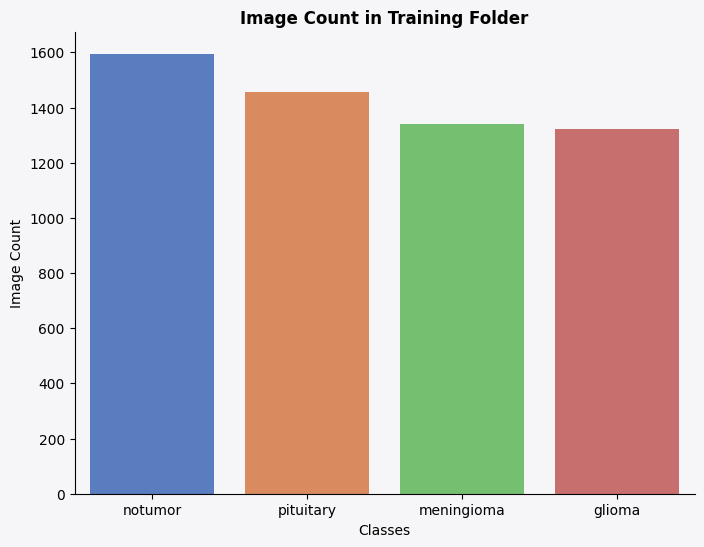

In [44]:
# Counting the images in training df and plotting bar graph for class counts
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)    
class_counts = training_df["classes"].value_counts()     # Counting the images
# Plotting the bar graph
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted', ax=ax)
ax.set_xlabel("Classes")
ax.set_ylabel("Image Count")
ax.set_title("Image Count in Training Folder", weight="bold")
plt.show()


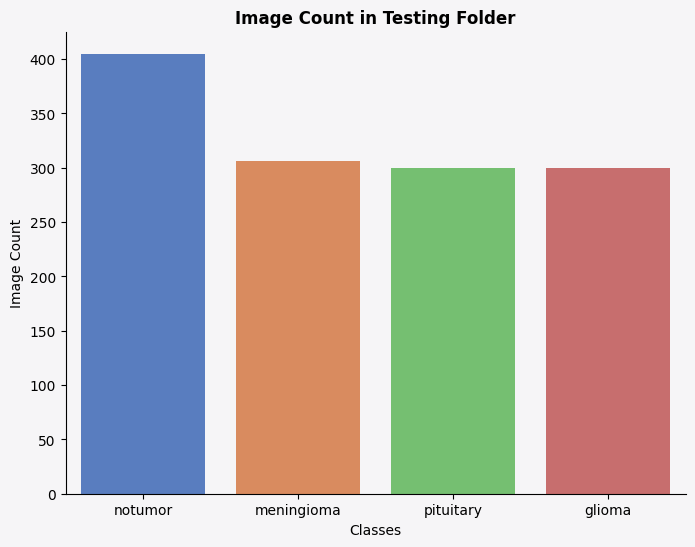

In [45]:
# Counting the images in testing df and plotting bar graph for class counts
fig, ax = plt.subplots(figsize=(8, 6))
fig.patch.set_facecolor("#f6f5f7")
ax.set_facecolor("#f6f5f7")
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)
class_counts = testing_df["classes"].value_counts()     # Counting the images
# Plotting the bar graph with vertical bars
sns.barplot(x=class_counts.index, y=class_counts.values, palette='muted', ax=ax)
ax.set_xlabel("Classes")
ax.set_ylabel("Image Count")
ax.set_title("Image Count in Testing Folder", weight="bold")
plt.show()

In [46]:
# Splitting the validation dataframe from testing dataframe
validation_df, testing_df = train_test_split(testing_df, train_size=0.5, shuffle=True, random_state=42)

In [49]:
# Display the validation dataframe
testing_df

,file_paths,classes
1120,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
1072,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
198,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
575,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,notumor
331,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,notumor
...,...,...
1264,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
755,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,glioma
839,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,glioma
793,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,glioma


In [50]:
# Display the validation dataframe
validation_df

,file_paths,classes
7,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,pituitary
666,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,notumor
1074,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
357,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,notumor
329,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,notumor
...,...,...
1095,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
1130,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
1294,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,meningioma
860,/Users/ys/Drive d/NEU/Sem 4 [Summer]/MLOPS Pro...,glioma
